## Making dither pattern plots for the paper, adapted from MAF tutorials

In [49]:
from __future__ import division
%pylab inline
from scipy import stats
from angles import r2d, r2arcs, d2arcs, arcs2r
def arcm2r(theta):
    return arcs2r(theta*60)
import seaborn as sns;sns.set_style('darkgrid')
import lsst.sims.maf.stackers as stackers
import treecorr as tr
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 12,32
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from collections import defaultdict
import treecorr
from itertools import chain
sns.set_context('poster',font_scale=1.4)

Populating the interactive namespace from numpy and matplotlib


/global/common/software/lsst/common/miniconda/py3-4.3.21/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import inspect
ditherStackerList = []
for name, s in inspect.getmembers(stackers):
    if inspect.isclass(s):
        if 'Dither' in s.__name__:
            ditherStackerList.append(s)

In [78]:
def plotDither(ditherStacker, ax, nvisits=1000, addPolygon=True):
    # Set up some 'data' on a single pointing to dither
    fieldIds = np.ones(nvisits, int)
    fieldRA = np.zeros(nvisits, float) + 10.0
    fieldDec = np.zeros(nvisits, float)
    night = np.arange(0, nvisits/2.0, 0.5)
    night = np.floor(night)
    simdata = np.core.records.fromarrays(
        [fieldIds, fieldRA, fieldDec, night],
        names=['fieldId', 'fieldRA', 'fieldDec', 'night'])

    # Apply the stacker.
    simdata = ditherStacker.run(simdata)
    ax.set_aspect('equal', 'box')
    # Draw a point for the center of the FOV.
    x = simdata['fieldRA'][0]
    y = simdata['fieldDec'][0]
    # ax.plot(x-10, y, 'g+')
    # Draw a circle approximately the size of the FOV.
    stepsize = np.pi/50.
    theta = np.arange(0, np.pi*2.+stepsize, stepsize)
    radius = 1.75
    ax.plot(radius*np.cos(theta)+x-10, radius*np.sin(theta)+y, '-', color=sns.color_palette('colorblind')[0])
    # Add the inscribed hexagon
    nside = 6
    a = np.arange(0, nside)
    xCoords = np.sin(2*np.pi/float(nside)*a + np.pi/2.0)*radius + x
    yCoords = np.cos(2*np.pi/float(nside)*a + np.pi/2.0)*radius + y
    xCoords = np.concatenate([xCoords, np.array([xCoords[0]])])
    yCoords = np.concatenate([yCoords, np.array([yCoords[0]])])
    ax.plot(xCoords-10, yCoords, '-', color=sns.color_palette('colorblind')[1])
    # Draw the dithered pointings.
    x = simdata[s.colsAdded[0]]
    y = simdata[s.colsAdded[1]]
    ax.plot(x-10, y, 'k-', alpha=0.2)
    ax.plot(x-10, y, '.', color=sns.color_palette('colorblind')[3])
    ax.set_title(s.__class__.__name__)


In [79]:
sns.set_style('whitegrid')

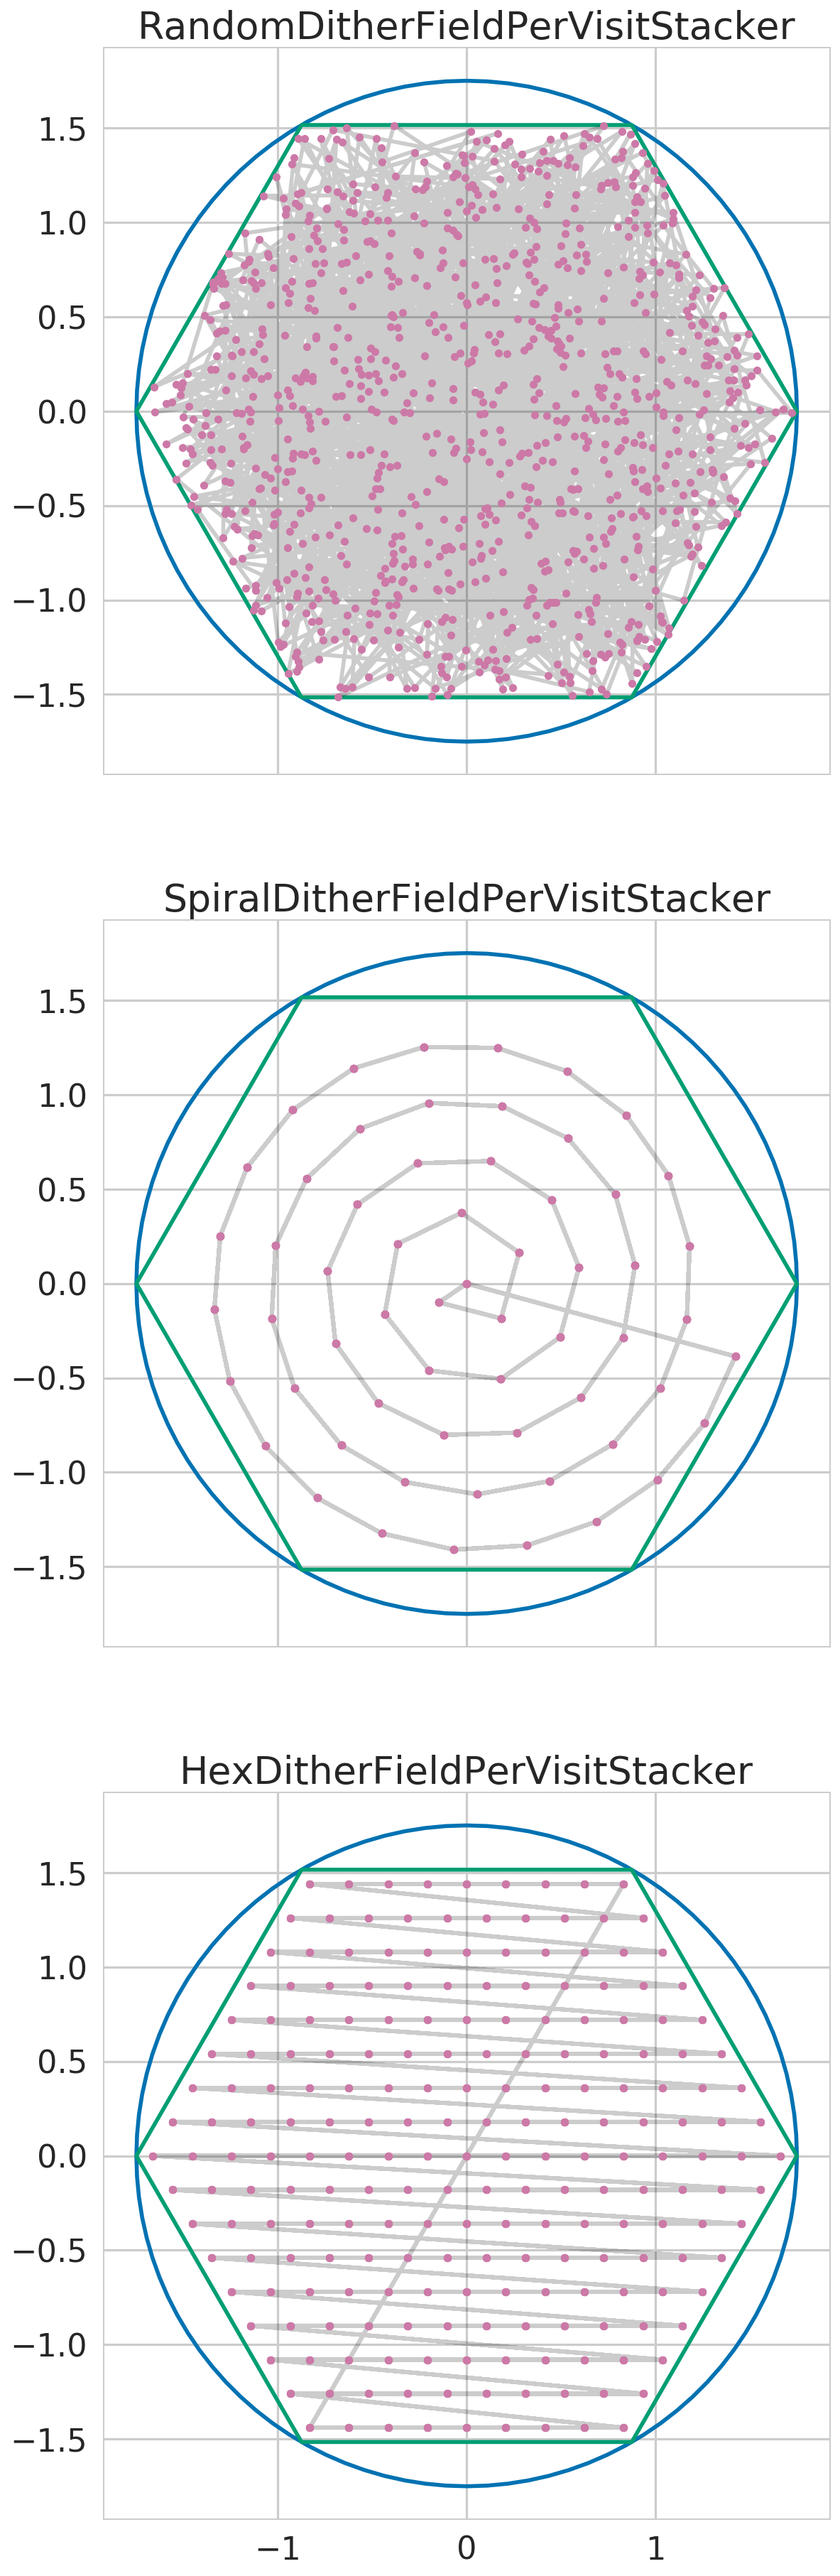

In [80]:
f, axarr = plt.subplots(3, sharex=True)
s = stackers.ditherStackers.RandomDitherFieldPerVisitStacker()

plotDither(s, axarr[0])


s = stackers.ditherStackers.SpiralDitherFieldPerVisitStacker()

plotDither(s, axarr[1])



s = stackers.ditherStackers.HexDitherFieldPerVisitStacker()


plotDither(s, axarr[2])




In [74]:
sns.color_palette('colorblind')[0]

(0.0, 0.4470588235294118, 0.6980392156862745)

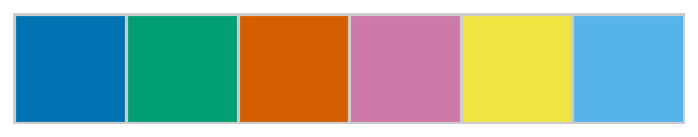

In [69]:
sns.palplot(sns.color_palette('colorblind'))

In [70]:
sns.xkcd_rgb["pale red"]

'#d9544d'